#ATSC 409 Assignment 06

## Problem Experiment:

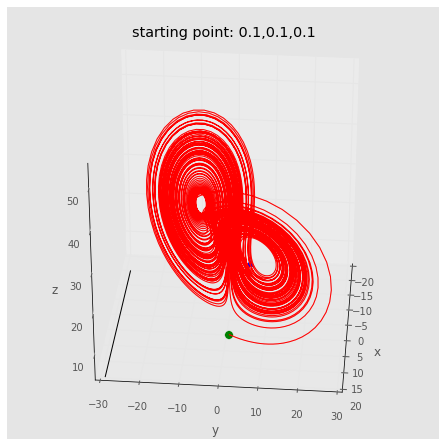

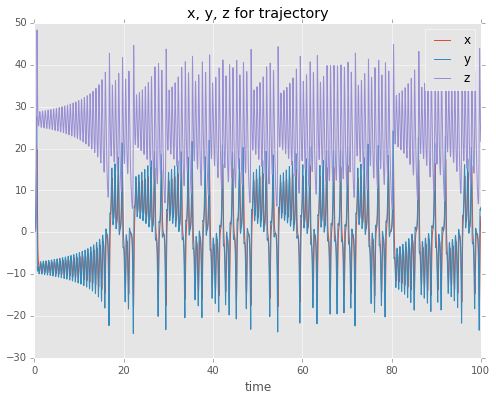

In [35]:
%matplotlib inline
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
        timevars = namedtuple('timevars', self.config['timevars'].keys())
        self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array([self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f
        
def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax
    
#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=100,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars=dict(x=0.1,y=0.1,z=0.1)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist = theSolver.timeloop5fixed()
xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax=plot_3d(ax,xvals,yvals,zvals)
out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))

fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(timevals,xvals,label='x')
ax.plot(timevals,yvals,label='y')
ax.plot(timevals,zvals,label='z')
ax.set(title='x, y, z for trajectory',xlabel='time')
out=ax.legend()

1. Fixing the initial conditions at (5,5,5), we vary rho between 0 and 100. When rho <= 1, the system reaches a stable zero steady-state solution for x, y, and z. When rho > 1 and rho < 470/19 (the critical value of rho), the system reaches a stable non-zero steady-state solution for x, y, and z, and x and y have almost equivalent solutions. When rho >= 470/19, the system reaches an unstable non-zero oscillatory steady-state solution for x, y, and z, and again, x and y have almost equivalent solutions.
2. Fixing rho at 28, we vary the initial conditions. When the initial conditions are (0,0,0), the system reaches a stable zero steady-state solution for x, y, and z. When the initial conditions are perturbed to (0.1,0.1,0.1), the system behaves in an irregular oscillatory manner that is completely different from that of when the initial conditions were (0,0,0). When the initial conditions are (0,0,20), the system reaches a stable zero steady-state solution again. When the initial conditions are (100,100,100), the system goes up and down wildly at first and then converges to an oscillatory solution. When the initial conditions are (8.5,8.5,27), the system is stable at first and then becomes oscillatory later on. When the initial conditions are (0,100,27), x and y go to the same point and converge to the same steady-state behavior, which is oscillatory for the entire system.
3. The different types of behavior we've seen are stable zero steady-state, stable non-zero steady-state, and unstable oscillatory steady-state. It is true that the solution remains within a bounded region despite the oscillations. It is true that the solution flips back and forth between the two wings of the butterfly diagram only when rho > 1. It is also true that the resulting solution depends very heavily on the given initial conditions, as seen in the difference in the solutions of the original initial conditions (0,0,0) and the perturbed initial conditions (0.1,0.1,0.1). It is also true that the solution is chaotic but for certain values of the parameters only; we've seen instances of stable steady-state solutions where we could actually predict the solution at the future time to some extent.
4. Changing the initial condition does affect where the solution ends up and there really is an attractor which solutions approach as t goes to infinity. My hypothesis is that each set of parameters and initial conditions leads to a unique attractor.
5. Based on the graphs, x and y always have the same long-term behavior. In context, this means that the intensity of the convective motion is proportional to the temperature difference between the ascending and descending currents. The more vigorous the circulation, the larger the difference is between the currents. We also saw that altering rho affects the steady-state solution of the system, which makes sense since rho represents the temperature difference between the top and bottom of the tank. The periodic behavior seen in the graphs represents the never-ending circulation of the currents within the tank.

##Problem Adaptive:

The total elapsed time for the fixed scheme is 0.8065330982208252 seconds.
The total elapsed time for the adaptive scheme is 0.83455491065979 seconds.
The total elapsed time for the odeint module is 0.10006594657897949 seconds.


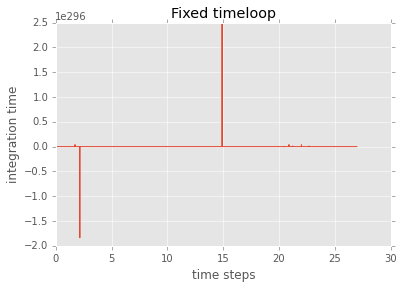

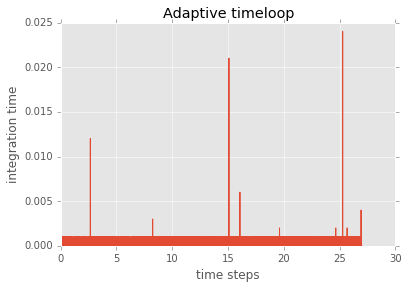

In [40]:
import time
from scipy import integrate

class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
        timevars = namedtuple('timevars', self.config['timevars'].keys())
        self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array([self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f
    
    def timeloop5Err(self):
        """return errors as well as values
        """
        t = self.timevars
        a = self.adaptvars
        i = self.initvars
        nvars = self.nvars
        oldTime = t.tstart
        olddt = t.dt
        yold = self.yinit
        yerror = np.zeros_like(yold)
        num = 0
        badsteps = 0
        goodsteps = 0
        timeVals = []
        yvals = []
        errorList = []
        integrationTime = []
        t_start = time.time()
        while(oldTime < t.tend):
            tic = time.time()
            timeVals.append(oldTime)
            yvals.append(yold)
            errorList.append(yerror)
            if(num > a.maxsteps):
                raise Exception('num > maxsteps')
            # start out with goodstep false and
            # try different sizes for the next step
            # until one meets the error conditions
            # then move onto next step by setting
            # goodstep to true
            goodStep = False
            failSteps = 0
            while(not goodStep):
                # to exit this loop, need to
                # get the estimated error smaller than
                # the desired error set by the relative
                # tolerance
                if(failSteps > a.maxfail):
                    raise Exception('failSteps > a.maxfail')
                #
                # try a timestep, we may need to reverse this
                #
                ynew, yerror, timeStep = self.rkckODE5(yold, oldTime, olddt)
                # print("try a step: : ", ynew)
                #
                # lab 5 section 4.2.3
                # find the desired tolerance by multiplying the relative
                # tolerance (RTOL) times the value of y
                # compare this to the error estimate returnd from rkckODE5
                # atol takes care of the possibility that y~0 at some point
                #
                errtest = 0.
                for i in range(nvars):
                    errtest = errtest + \
                        (yerror[i] / (a.atol + a.rtol * np.abs(ynew[i])))**2.0
                errtest = np.sqrt(errtest / nvars)
                #
                # lab5 equation 4.13, S
                #
                dtchange = a.s * (1.0 / errtest)**0.2
                # print("dtchange, errtest, timeStep: ",
                #       dtchange, errtest, timeStep, ynew, yerror)
                if (errtest > 1.0):
                    # estimated error is too big so
                    # reduce the timestep and retry
                    # dtFailMax ~ 0.5, which guarantees that
                    # the new timestep is reduced by at least a
                    # factor of 2
                    # dtFailMin~0.1, which means that we don't trust
                    # the estimate to reduce the timestep by more
                    # than a factor of 10 in one loop
                    if(dtchange > a.dtfailmax):
                        olddt = a.dtfailmax * olddt
                    elif (dtchange < a.dtfailmin):
                        olddt = a.dtfailmin * olddt
                    else:
                        olddt = dtchange * olddt
                    if (timeStep + olddt == timeStep):
                        raise Exception('step smaller than machine precision')
                    failSteps = failSteps + 1
                    #
                    # undo the timestep since the error wasn't small enough
                    #
                    ynew = yold
                    timeStep = oldTime
                    # go back to top and see if this olddt produices
                    # a better yerrror
                else:
                    # errtest < 1, so we're happy
                    # try to enlarge the timestep by a factor of dtChange > 1
                    # but keep it smaller than dtpassmax
                    # try enlarging the timestep bigger for next time
                    # dtpassmin ~ 0.1 and dtpassmax ~ 5
                    if (abs((1.0 - dtchange)) > a.dtpassmin):
                        if(dtchange > a.dtpassmax):
                            dtnew = a.dtpassmax * olddt
                        else:
                            dtnew = dtchange * olddt
                    else:
                        # don't bother changing the step size if
                        # the change is less than dtpassmin
                        dtnew = olddt
                    goodStep = True
                    #
                    # overwrite the old timestep with the new one
                    #
                    oldTime = timeStep
                    yold = ynew
                    # go back up to top while(timeStep < t.tend)
                    goodsteps = goodsteps + 1
                #
                # this is number of times we decreased the step size without
                #  advancing
                #
                badsteps = badsteps + failSteps
            # special case if we're within one ortwo timesteps of the end
            # otherwise, set dt to the new timestep size
            if(timeStep + dtnew > t.tend):
                olddt = t.tend - timeStep
            elif(timeStep + 2.0 * dtnew > t.tend):
                olddt = (t.tend - timeStep) / 2.0
            else:
                olddt = dtnew
            elapsed = time.time() - tic
            integrationTime.append(elapsed)
        t_total = time.time() - t_start
        timeVals = np.array(timeVals).squeeze()
        yvals = np.array(yvals).squeeze()
        errorVals = np.array(errorList).squeeze()
        integTime = np.array(integrationTime).squeeze()
        self.timevals = timeVals
        self.yvals = yvals
        self.errorVals = errorVals
        self.integTime = integTime
        self.t_total = t_total
        return (timeVals, yvals, errorVals, integTime, t_total)

    def timeloop5fixed(self):
        """fixed time step with
           estimated errors
        """
        t = self.timevars
        yold = self.yinit
        yError = np.zeros_like(yold)
        yvals = [yold]
        errorList = [yError]
        timeSteps = np.arange(t.tstart, t.tend, t.dt)
        integrationTime = np.ndarray((len(timeSteps),), float)
        t_start = time.time()
        for theTime in timeSteps[:-1]:
            tic = time.time()
            yold, yError, newTime = self.rkckODE5(yold, theTime, t.dt)
            yvals.append(yold)
            errorList.append(yError)
            elapsed = time.time() - tic
            integrationTime[theTime] = elapsed
        t_total = time.time() - t_start
        yvals = np.array(yvals).squeeze()
        errorVals = np.array(errorList).squeeze()
        return (timeSteps, yvals, errorVals, integrationTime, t_total)
    

#
# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=27,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars=dict(x=5,y=5,z=5)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#
# expand the params dictionary into key,value pairs for
# the Integ61 constructor using dictionary expansion
#
theSolver = Integ61('lorenz.yaml',**params)
timevals, coords, errorlist, integTime, t = theSolver.timeloop5fixed()
timevals2, coords2, errorlist2, integTime2, t2 = theSolver.timeloop5Err()


##### Solution using the fixed scheme:
thefig, theAx = plt.subplots(1,1)
theLines = theAx.plot(timevals, integTime)
theAx.set_title('Fixed timeloop')
theAx.set_xlabel('time steps')
theAx.set_ylabel('integration time')

##### Solution using the adaptive scheme:
thefig, theAx = plt.subplots(1,1)
theLines = theAx.plot(timevals2, integTime2)
theAx.set_title('Adaptive timeloop')
theAx.set_xlabel('time steps')
theAx.set_ylabel('integration time')

##### Solution using the odeint module:
def lorentz_deriv(coords, t0, sigma=10., beta=8./3, rho=28.0):
    x,y,z = coords
    out = [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
    return out
x0 = np.array([5,5,5])
tt = np.linspace(0, 50, 1000)
tic = time.time()
x_t = integrate.odeint(lorentz_deriv, x0, tt)
t3 = time.time() - tic


print("The total elapsed time for the fixed scheme is " + str(t) + " seconds.")
print("The total elapsed time for the adaptive scheme is " + str(t2) + " seconds.")
print("The total elapsed time for the odeint module is " + str(t3) + " seconds.")

On average, the fixed stepsize takes less total integration time and is therefore faster than the adaptive stepsize. The time complexity of both the fixed scheme and the adaptive scheme is O(n), meaning the computation of the solution at each time step depends on the total number of time steps. The difference is that the adaptive scheme takes about two or three times as long as the fixed scheme to compute the solution at a single time step. The odeint module is about 8 times as fast as the fixed scheme.